# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Дерево-Решений" data-toc-modified-id="Дерево-Решений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дерево Решений</a></span></li><li><span><a href="#Cлучайный-лес" data-toc-modified-id="Cлучайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Cлучайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span><ul class="toc-item"><li><span><a href="#Дерево-Решений" data-toc-modified-id="Дерево-Решений-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Дерево Решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span><ul class="toc-item"><li><span><a href="#Дерево-Решений" data-toc-modified-id="Дерево-Решений-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Дерево Решений</a></span></li><li><span><a href="#Cлучайный-лес" data-toc-modified-id="Cлучайный-лес-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Cлучайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span><ul class="toc-item"><li><span><a href="#Дерево-Решений" data-toc-modified-id="Дерево-Решений-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Дерево Решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


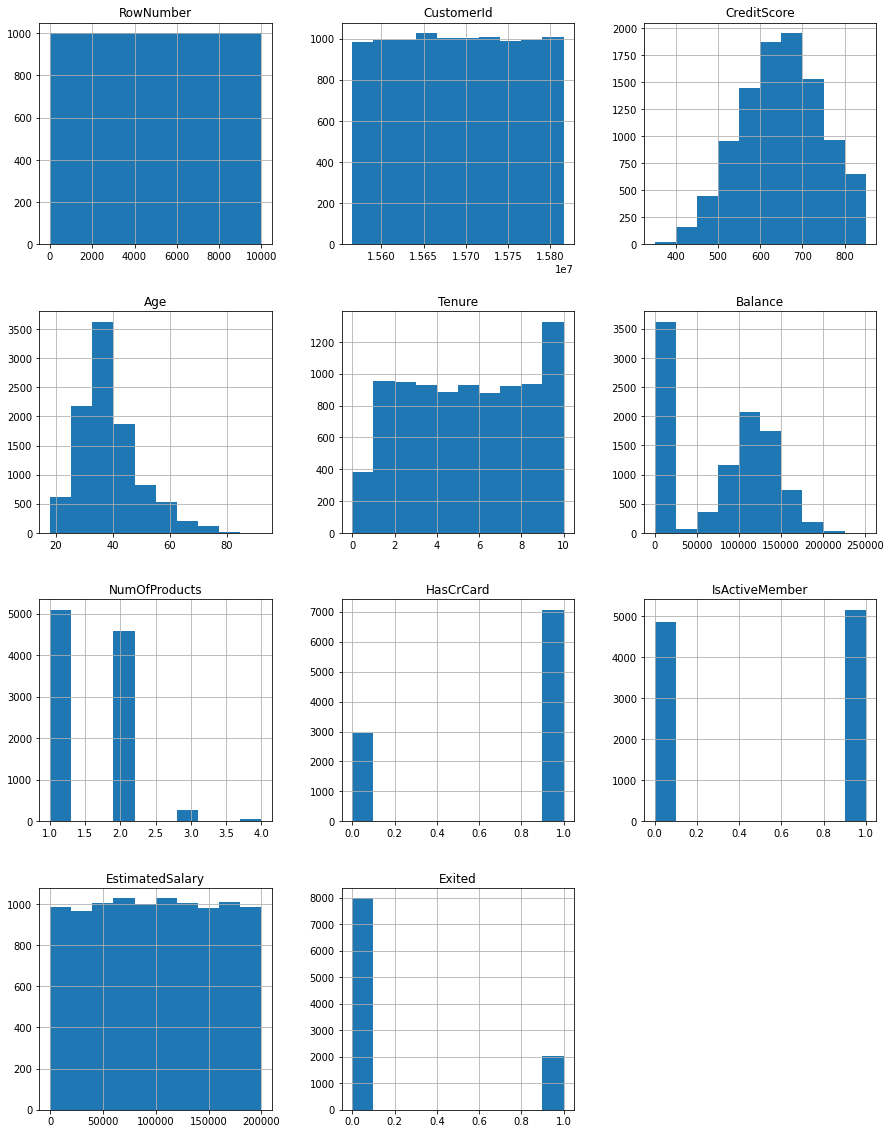

In [5]:
df.hist(figsize=(15, 20));

0    7963
1    2037
Name: Exited, dtype: int64

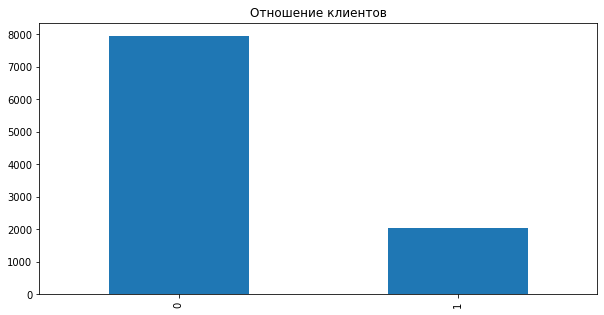

In [6]:
df['Exited'].value_counts().plot(kind='bar',figsize=(10,5),title='Oтношение клиентов')
df['Exited'].value_counts()

* столбцы RowNumber, Surname и CustomerId не содержат необходимой информации, их удалим
* Geography, Gender — преобрауем методом OHE
* Tenure — пропусков около 10% от всех данных. На графике похоже на нормальное распредение, если заполним медианой, то это приведет к необоснованному выбросу. Поэтому заполним числами от 0 до 10
* CreditScore, Age, Tenur, Balance, NumOfProducts, EstimatedSalary — масштабируем
* Дисбаланс в данных: количество ушедших клиентов в 4 раза меньше действующих, дисбаланс поправим при увеличении/уменьшении выборок

In [7]:
# Удалим лишние столбцы
df=df.drop(['RowNumber','Surname', 'CustomerId'], axis=1)

<AxesSubplot:>

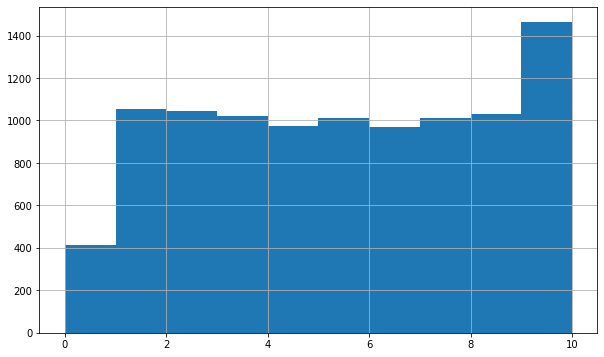

In [8]:
# создаём случайный ряд путём сэмплирования из ряда известных значений
rand = df["Tenure"].dropna()\
    .sample(n=df.shape[0], replace=True)\
    .reset_index(drop=True)

# заполняем пропуски значениями из случайного ряда
df["Tenure"] = df["Tenure"].fillna(rand)
df["Tenure"].hist(figsize=(10, 6))

In [9]:
#Масштабируем данные
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
#Стандартизируем признаки с помощью StandardScaler
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(df[numeric])
df[numeric] = scaler.transform(df[numeric])

df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.035481,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,-1.380756,0.117350,-0.911583,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,1.036171,1.333053,2.527057,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,-1.380756,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.035481,0.785728,-0.911583,1,1,-0.365276,0,0,1,0


## Исследование задачи

In [11]:
features = df.drop(['Exited'],axis=1)
target = df['Exited']

In [12]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4, random_state=19191)
features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test, test_size=0.5, random_state=19191)
print(features_train.shape, features_test.shape, features_valid.shape)
print(target_train.shape, target_test.shape, target_valid.shape)

(6000, 11) (2000, 11) (2000, 11)
(6000,) (2000,) (2000,)


### Дерево Решений

In [13]:
model_DTC = DecisionTreeClassifier(random_state=19191)
model_DTC.fit(features_train, target_train)

predicted_valid_DTC = model_DTC.predict(features_valid)
probabilities_valid_DTC = model_DTC.predict_proba(features_valid)
probabilities_one_valid_DTC = probabilities_valid_DTC[:, 1]

print('Дерево Решений:')
print("F1:", f1_score(target_valid, predicted_valid_DTC))
print("accuracy:", accuracy_score(target_valid, predicted_valid_DTC))
print("auc_roc:", roc_auc_score(target_valid, probabilities_one_valid_DTC))

Дерево Решений:
F1: 0.5104408352668214
accuracy: 0.789
auc_roc: 0.6870449823731247


### Cлучайный лес

In [14]:
model_RFC = RandomForestClassifier(random_state=19191)
model_RFC.fit(features_train, target_train)

predicted_valid_RFC = model_RFC.predict(features_valid)
probabilities_valid_RFC = model_RFC.predict_proba(features_valid)
probabilities_one_valid_RFC = probabilities_valid_RFC[:, 1]

print('Cлучайный лес:')
print("F1:", f1_score(target_valid, predicted_valid_RFC))
print("accuracy:", accuracy_score(target_valid, predicted_valid_RFC))
print("auc_roc:", roc_auc_score(target_valid, probabilities_one_valid_RFC))

Cлучайный лес:
F1: 0.5991316931982633
accuracy: 0.8615
auc_roc: 0.8577968760115591


### Логистическая регрессия

In [15]:
model_LR =  LogisticRegression(solver='liblinear', random_state = 19191)
model_LR.fit(features_train, target_train)

predicted_valid_LR = model_LR.predict(features_valid)
probabilities_valid_LR = model_LR.predict_proba(features_valid)
probabilities_one_valid_LR = probabilities_valid_LR[:, 1]

print('Логистическая регрессия:')
print("F1:", f1_score(target_valid, predicted_valid_LR))
print("accuracy:", accuracy_score(target_valid, predicted_valid_LR))
print("auc_roc:", roc_auc_score(target_valid, probabilities_one_valid_LR))

Логистическая регрессия:
F1: 0.2968197879858657
accuracy: 0.801
auc_roc: 0.7651608783421909


## Борьба с дисбалансом

### Взвешивание классов

#### Дерево Решений

In [16]:
best_model_balanced_DTC = None
best_f1_balanced_DTC = 0
best_depth_balanced_DTC = 0
for depth in range(1, 8):
    model_DTC = DecisionTreeClassifier(random_state=19191, max_depth=depth, class_weight='balanced')
    model_DTC.fit(features_train, target_train)

    prediction = model_DTC.predict(features_valid)
    f1_DTC = f1_score(target_valid, prediction)
    if f1_DTC > best_f1_balanced_DTC:
        best_model_balanced_DTC = model_DTC
        best_f1_balanced_DTC = f1_DTC
        best_depth_balanced_DTC = depth
probabilities_balanced_DTC = best_model_balanced_DTC.predict_proba(features_valid)[:, 1]

print("Дерево Решений: f1 наилучшей модели ", best_f1_balanced_DTC, 
      "глубина:", best_depth_balanced_DTC,
     "AUC-ROC", roc_auc_score(target_valid, probabilities_balanced_DTC))

Дерево Решений: f1 наилучшей модели  0.5747747747747748 глубина: 4 AUC-ROC 0.8255093843247346


#### Случайный лес

In [17]:
best_model_balanced_RFC = None
best_f1_balanced_RFC = 0
best_est_balanced_RFC = 0
best_depth_balanced_RFC = 0
best_min_samples_leaf = 0
for est in range(30, 70, 5):
    for depth in range(5, 10):
        for leaf in range(3, 7):
            model_RFC = RandomForestClassifier(random_state=19191, 
                                               n_estimators=est, 
                                               max_depth=depth, 
                                               min_samples_leaf = leaf,
                                               n_jobs=-1,
                                               class_weight='balanced')
            model_RFC.fit(features_train, target_train)
            prediction = model_RFC.predict(features_valid)
            f1_RFC = f1_score(target_valid, prediction)
            if f1_RFC > best_f1_balanced_RFC:
                best_model_balanced_RFC = model_RFC
                best_f1_balanced_RFC = f1_RFC
                best_est_balanced_RFC = est
                best_depth_balanced_RFC = depth
                best_min_samples_leaf = leaf
probabilities_balanced_RFC = best_model_balanced_RFC.predict_proba(features_valid)[:, 1]
print("Cлучайный лес: f1 наилучшей модели", best_f1_balanced_RFC, 
      "Количество деревьев:", best_est_balanced_RFC, 
      'Глубина:', best_depth_balanced_RFC,
      'минимальное количество объектов в листе:', best_min_samples_leaf,
      "AUC-ROC", roc_auc_score(target_valid, probabilities_balanced_RFC))

Cлучайный лес: f1 наилучшей модели 0.6561844863731656 Количество деревьев: 50 Глубина: 8 минимальное количество объектов в листе: 5 AUC-ROC 0.8684693751434573


#### Логистическая регрессия

In [18]:
model_balanced_LR = LogisticRegression(random_state=19191, solver='liblinear', class_weight='balanced')
model_balanced_LR.fit(features_train, target_train)
predicted_balanced_LR = model_balanced_LR.predict(features_valid)
probabilities_balanced_LR = model_balanced_LR.predict_proba(features_valid)[:, 1]
print("Логистическая регрессия: F1", f1_score(target_valid, predicted_balanced_LR),
     "AUC-ROC", roc_auc_score(target_valid, probabilities_balanced_LR))

Логистическая регрессия: F1 0.49829351535836175 AUC-ROC 0.769957507165516


Наилучший результат у модели Случайного леса: 
* F1 : 0.6471204188481676 
* Количество деревьев: 55 
* Глубина: 8 
* Минимальное количество объектов в листе: 6
* AUC-ROC 0.8255093843247346

### Увеличение выборки

In [19]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=19191)
    
    return features_upsampled, target_upsampled

In [20]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

#### Дерево Решений

In [21]:
best_model_ups_DTC = None
best_f1_ups_DTC = 0
best_depth_ups_DTC = 0

for depth in range(1, 8):
    model_DTC = DecisionTreeClassifier(random_state=19191, max_depth=depth)
    model_DTC.fit(features_upsampled, target_upsampled)

    prediction = model_DTC.predict(features_valid)
    f1_DTC = f1_score(target_valid, prediction)
    if f1_DTC > best_f1_ups_DTC:
        best_model_ups_DTC = model_DTC
        best_f1_ups_DTC = f1_DTC
        best_depth_ups_DTC = depth
print("f1 наилучшей модели Дерево Решений:", best_f1_ups_DTC, "глубина:", best_depth_ups_DTC)

f1 наилучшей модели Дерево Решений: 0.5747747747747748 глубина: 4


#### Cлучайный лес

In [22]:
best_model_ups_RFC = None
best_f1_ups_RFC = 0
best_est_ups_RFC = 0
best_depth_ups_RFC = 0
for est in range(30, 70, 5):
    for depth in range(5, 10):
        model_RFC = RandomForestClassifier(random_state=19191, 
                                           n_estimators=est, 
                                           n_jobs=-1,
                                           max_depth=depth)
        model_RFC.fit(features_upsampled, target_upsampled)
        prediction = model_RFC.predict(features_valid)
        f1_RFC = f1_score(target_valid, prediction)
        if f1_RFC > best_f1_ups_RFC:
            best_model_ups_RFC = model_RFC
            best_f1_ups_RFC = f1_RFC
            best_est_ups_RFC = est
            best_depth_ups_RFC = depth
print("f1 наилучшей модели Cлучайный лес:", best_f1_ups_RFC, 
      "Количество деревьев:", best_est_ups_RFC, 
      'Глубина:', best_depth_ups_RFC)

f1 наилучшей модели Cлучайный лес: 0.64 Количество деревьев: 40 Глубина: 9


#### Логистическая регрессия

In [24]:
model_LR_ups = LogisticRegression(random_state=19191, solver='liblinear')
model_LR_ups.fit(features_upsampled, target_upsampled)
predicted_ups_LR = model_LR_ups.predict(features_valid)
probabilities_valid_LR_ups = model_LR_ups.predict_proba(features_valid)
probabilities_one_valid_LR_ups = probabilities_valid_LR_ups[:, 1]

print("F1:", f1_score(target_valid, predicted_ups_LR))

F1: 0.5004226542688082


Наилучший результат также у модели Случайного леса, однако показатель F1 немного меньше, чем у аналогичной модели, полученной при сбалансированным взвешивании классов

### Уменьшение выборки

In [25]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [26]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

#### Дерево Решений

In [27]:
best_model_ds_DTC = None
best_f1_ds_DTC = 0
best_depth_ds_DTC = 0

for depth in range(1, 10):
    model_DTC = DecisionTreeClassifier(random_state=19191, max_depth=depth)
    model_DTC.fit(features_downsampled, target_downsampled)

    prediction = model_DTC.predict(features_valid)
    f1_DTC = f1_score(target_valid, prediction)
    if f1_DTC > best_f1_ds_DTC:
        best_model_ds_DTC = model_DTC
        best_f1_ds_DTC = f1_DTC
        best_depth_ds_DTC = depth
print("f1 наилучшей модели Дерево Решений:", best_f1_ds_DTC, "глубина:", best_depth_ds_DTC)

f1 наилучшей модели Дерево Решений: 0.511968085106383 глубина: 5


#### Случайный лес

In [28]:
best_model_ds_RFC = None
best_f1_ds_RFC = 0
best_est_ds_RFC = 0
best_depth_ds_RFC = 0
for est in range(20, 100, 10):
    for depth in range(1, 6):
        model_RFC = RandomForestClassifier(random_state=19191, n_estimators=est, max_depth=depth)
        model_RFC.fit(features_downsampled, target_downsampled)
        prediction = model_RFC.predict(features_valid)
        f1_RFC = f1_score(target_valid, prediction)
        if f1_RFC > best_f1_ds_RFC:
            best_model_ds_RFC = model_RFC
            best_f1_ds_RFC = f1_RFC
            best_est_ds_RFC = est
            best_depth_ds_RFC = depth
print("f1 наилучшей модели Cлучайный лес:", best_f1_ds_RFC, 
      "Количество деревьев:", best_est_ds_RFC, 
      'Глубина:', best_depth_ds_RFC)

f1 наилучшей модели Cлучайный лес: 0.43899895724713245 Количество деревьев: 20 Глубина: 5


#### Логистическая регрессия

In [29]:
model_LR_ds =  LogisticRegression(random_state=12345, solver='liblinear')
model_LR_ds.fit(features_downsampled, target_downsampled)
predicted_LR_ds = model_LR_ds.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_LR_ds))

F1: 0.43454644215100496


При уменьшении выборки показатели моделей значительно хуже

<Figure size 432x288 with 0 Axes>

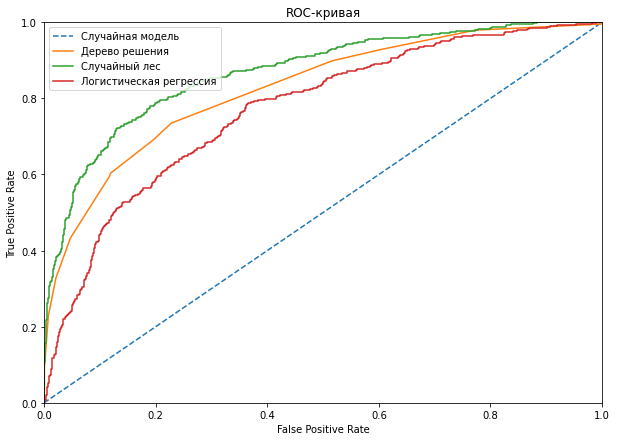

In [30]:
fpr_DTC, tpr_DTC, thresholds = roc_curve(target_valid, probabilities_balanced_DTC)
fpr_RFC, tpr_RFC, thresholds = roc_curve(target_valid, probabilities_balanced_RFC)
fpr_LR, tpr_LR, thresholds = roc_curve(target_valid, probabilities_balanced_LR)

#рассмотрим ROC-кривые моделей, в сбалансированных моделях

plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_DTC, tpr_DTC)
plt.plot(fpr_RFC, tpr_RFC)
plt.plot(fpr_LR, tpr_LR)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Дерево решения','Случайный лес','Логистическая регрессия'),
           loc= 'upper left') 
plt.show()

Наилучший результат у модели Случайный лес с взвешиванием классов
- Количество деревьев: 55 
- Глубина: 8 
- Минимальное количество объектов в листе: 6

Показатели
* F1 : 0.6471204188481676 
* AUC-ROC 0.8255093843247346

## Тестирование модели

In [31]:
final_test_predictions = best_model_balanced_RFC.predict(features_test)

final_predicted = best_model_balanced_RFC.predict(features_test)
final_probabilities_valid = best_model_balanced_RFC.predict_proba(features_test)
final_probabilities_one_valid = final_probabilities_valid[:, 1]

print('Случайный лес на тестовой выборке:')
print("F1:", f1_score(target_test, final_predicted))
print("accuracy:", accuracy_score(target_test, final_predicted))
print("auc_roc:", roc_auc_score(target_test, final_probabilities_one_valid))

Случайный лес на тестовой выборке:
F1: 0.6136101499423299
accuracy: 0.8325
auc_roc: 0.859716995791622


Цель достигнула: 
* F1 больше 0.59
* AUC-ROC   0.858 (близко к 1, у случайной модели 0.5)